Мышковец С.А., v.01 30.10.2022

Решение задачи: Построить модель машинного обучения для предсказания вероятности того, что клиент уйдет в просрочку более 60 дней (delinq60plus).

В данной задаче нам представлены данные в которых ключевое поле — это то, просрочит ли клиент микро-финансовой организации выплату более чем на 60 дней или нет. 

Задачи:
1.  осуществить корректную загрузку данных
2.  осуществить разведывательный анализ данных:
- разбить выборку на обучающую и тестовую
- проанализировать пропуски и решить, что с ними делать
- удалить дубликаты
- проанализировать выбросы
- создать/ удалить переменные
- закодировать категориальные переменные
- нормализовать числовые переменные (при необходимости)
3. построить модель и оценить ее качество
4. при необходимости вернуться к предыдущим шагам, чтобы улучшить качество модели


Использовать (не везде, а где мы работаем с данными напрямую) SQL запросы. 


Вывод: 


# 1. Осуществить корректную загрузку данных

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 50)
df = pd.read_csv("MFOcredit.csv", sep= ';')

In [2]:
df.head()

,id,date_start,date_end,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus
0,1,03-Jan-2013,12-Jan-2013,Мужской,44,Нет,Собственное,Гражданский брак/женат/замужем,Нет,Официальное,Новосибирская область,Нет,Да,Нет
1,2,03-Jan-2013,17-Jan-2013,Мужской,21,Пропуск поля,Живут с родителями,Холост,Нет,Официальное,Кемеровская область юг,Да,Нет,Нет
2,3,03-Jan-2013,17-Jan-2013,Мужской,25,Пропуск поля,Собственное,Холост,Да,Официальное,Кемеровская область север,Пропуск поля,Нет,Нет
3,4,03-Jan-2013,17-Jan-2013,Женский,47,Пропуск поля,Собственное,Гражданский брак/женат/замужем,Да,Официальное,Кемеровская область север,Нет,Нет,Нет
4,5,03-Jan-2013,17-Jan-2013,Мужской,22,Нет,Арендуемое,Гражданский брак/женат/замужем,Нет,Официальное,Кемеровская область север,Да,Да,Нет


# 2. Осуществить разведывательный анализ данных:

## Проанализировать пропуски и решить, что с ними делать

In [3]:
df.describe()

,id,age
count,35212.000000,35212.000000
mean,17606.500000,37.243525
std,10164.973176,13.183961
min,1.000000,18.000000
25%,8803.750000,26.000000
50%,17606.500000,34.000000
75%,26409.250000,48.000000
max,35212.000000,75.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35212 entries, 0 to 35211
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            35212 non-null  int64 
 1   date_start    35212 non-null  object
 2   date_end      35212 non-null  object
 3   gender        35212 non-null  object
 4   age           35212 non-null  int64 
 5   auto          35212 non-null  object
 6   housing       35212 non-null  object
 7   marstatus     35212 non-null  object
 8   regclient     35212 non-null  object
 9   jobtype       35212 non-null  object
 10  region        35212 non-null  object
 11  credits       35212 non-null  object
 12  children      35212 non-null  object
 13  delinq60plus  35212 non-null  object
dtypes: int64(2), object(12)
memory usage: 3.8+ MB


In [5]:
df.isna().sum()

id              0
date_start      0
date_end        0
gender          0
age             0
auto            0
housing         0
marstatus       0
regclient       0
jobtype         0
region          0
credits         0
children        0
delinq60plus    0
dtype: int64

**Пропусков, NaN и нулевых значений в БД нет.**

In [6]:
df.groupby("gender")["id"].count().sort_values()

gender
Мужской    16937
Женский    18275
Name: id, dtype: int64

In [7]:
df.groupby("auto")["id"].count().sort_values()

auto
Да               3670
Пропуск поля    14077
Нет             17465
Name: id, dtype: int64

In [8]:
df.groupby("housing")["id"].count().sort_values()

housing
Муниципальное             1358
Арендуемое                2020
Долевая собственность     2955
Живут с родителями        3177
Пропуск поля              7603
Собственное              18099
Name: id, dtype: int64

In [9]:
df.groupby("marstatus")["id"].count().sort_values()

marstatus
Вдова/вдовец                       1845
Разведен                           2871
Пропуск поля                       7564
Холост                             8833
Гражданский брак/женат/замужем    14099
Name: id, dtype: int64

In [10]:
df.groupby("regclient")["id"].count().sort_values()

regclient
Нет    15479
Да     19733
Name: id, dtype: int64

In [11]:
df.groupby("jobtype")["id"].count().sort_values()

jobtype
Неофициальное     1167
Пропуск поля     14457
Официальное      19588
Name: id, dtype: int64

In [12]:
df.groupby("region")["id"].count().sort_values()

region
Красноярский край             2244
Новосибирская область         4327
Алтайский край                5172
Кемеровская область юг       11022
Кемеровская область север    12447
Name: id, dtype: int64

In [13]:
df.groupby("credits")["id"].count().sort_values()

credits
Пропуск поля      946
Да              16140
Нет             18126
Name: id, dtype: int64

In [14]:
df.groupby("children")["id"].count().sort_values()

children
Пропуск поля      745
Да              13326
Нет             21141
Name: id, dtype: int64

**Есть колонки ("auto", "housing", "marstatus", "jobtype", "credits", "children") со значением "Пропуск поля"**

<AxesSubplot:>

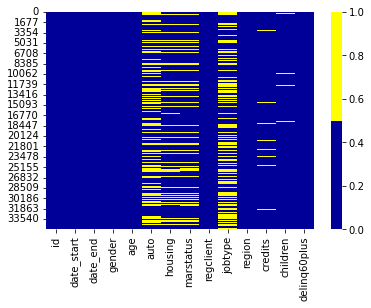

In [15]:
import seaborn as sns
cols = df.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols]=='Пропуск поля', cmap=sns.color_palette(colours))

In [16]:
df_4_Nan = df[(df['auto']=='Пропуск поля') & (df['housing']=='Пропуск поля') & (df['marstatus']=='Пропуск поля') & (df['jobtype']=='Пропуск поля')]

In [17]:
df_4_Nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 8 to 35211
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6422 non-null   int64 
 1   date_start    6422 non-null   object
 2   date_end      6422 non-null   object
 3   gender        6422 non-null   object
 4   age           6422 non-null   int64 
 5   auto          6422 non-null   object
 6   housing       6422 non-null   object
 7   marstatus     6422 non-null   object
 8   regclient     6422 non-null   object
 9   jobtype       6422 non-null   object
 10  region        6422 non-null   object
 11  credits       6422 non-null   object
 12  children      6422 non-null   object
 13  delinq60plus  6422 non-null   object
dtypes: int64(2), object(12)
memory usage: 752.6+ KB


In [18]:
# **Удаляем строки, в которых 4 колонки имееют значение "Пропуск поля"**

In [19]:
# df.drop(df[(df['auto']=='Пропуск поля') & (df['housing']=='Пропуск поля') & (df['marstatus']=='Пропуск поля') & (df['jobtype']=='Пропуск поля')].index, inplace = True)

In [20]:
# df.info()

In [21]:
# df.groupby("jobtype")["id"].count().sort_values()

In [22]:
# **Удаляем колонку 'jobtype', т.к. 48% данных неизвестны**

In [23]:
# df = df.drop(['jobtype'], axis=1)

In [24]:
# df.columns

In [25]:
# df.groupby("auto")["id"].count().sort_values()

**Учитывая 25% пропусков в колонке 'auto', исходим из худших финансовых гарантий и меняем значение 'Пропуск поля' на 'Нет'**

In [26]:
# df["auto"] = df["auto"].replace("Пропуск поля", "Нет", regex=True)

**Исходим из худших финансовых гарантий и меняем значение колонки "housing" с 'Пропуск поля' на 'Арендуемое'**

In [27]:
# df["housing"] = df["housing"].replace("Пропуск поля", "Арендуемое", regex=True)

In [28]:
# df.loc[df["children"] == "Да", "marstatus"] = "Гражданский брак/женат/замужем"

In [29]:
# df["marstatus"] = df["marstatus"].replace("Пропуск поля", "Разведен", regex=True)

In [30]:
# df["credits"] = df["credits"].replace("Пропуск поля", "Да", regex=True)

In [31]:
# df["children"] = df["children"].replace("Пропуск поля", "Да", regex=True)

In [32]:
# df["credits"] = df["credits"].replace("Да", 1 , regex=True)
# df["credits"] = df["credits"].replace("Нет", 0 , regex=True)

In [33]:
# df["regclient"] = df["regclient"].replace("Нет", 0 , regex=True)
# df["regclient"] = df["regclient"].replace("Да", 1 , regex=True)

In [34]:
# df["auto"] = df["auto"].replace("Нет", 0 , regex=True)
# df["auto"] = df["auto"].replace("Да", 1 , regex=True)

In [35]:
# df["children"] = df["children"].replace("Нет", 0 , regex=True)
# df["children"] = df["children"].replace("Да", 1 , regex=True)

In [36]:
# df.info()

# Удалить дубликаты

In [37]:
column_names = ['date_start', 'date_end', 'gender', 'age', 'auto', 'marstatus', 'housing', 'region', 'regclient', 'credits']

In [38]:
duplicates = df.duplicated(subset=column_names, keep=False)

In [39]:
df[duplicates].sort_values(by='id')

,id,date_start,date_end,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus
1100,1101,29-Jan-2013,12-Feb-2013,Мужской,26,Пропуск поля,Собственное,Гражданский брак/женат/замужем,Нет,Официальное,Кемеровская область юг,Нет,Да,Да
1114,1115,29-Jan-2013,12-Feb-2013,Мужской,26,Пропуск поля,Собственное,Гражданский брак/женат/замужем,Нет,Официальное,Кемеровская область юг,Нет,Нет,Да
2275,2276,21-Feb-2013,07-Mar-2013,Мужской,31,Пропуск поля,Пропуск поля,Пропуск поля,Да,Пропуск поля,Кемеровская область север,Нет,Да,Нет
2310,2311,21-Feb-2013,07-Mar-2013,Мужской,31,Пропуск поля,Пропуск поля,Пропуск поля,Да,Пропуск поля,Кемеровская область север,Нет,Нет,Да
2389,2390,23-Feb-2013,09-Mar-2013,Женский,27,Пропуск поля,Пропуск поля,Пропуск поля,Нет,Пропуск поля,Кемеровская область север,Да,Да,Нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35093,35094,03-Jan-2014,17-Jan-2014,Мужской,35,Пропуск поля,Пропуск поля,Пропуск поля,Да,Пропуск поля,Кемеровская область юг,Да,Да,Нет
35101,35102,03-Jan-2014,17-Jan-2014,Женский,23,Пропуск поля,Пропуск поля,Пропуск поля,Нет,Пропуск поля,Кемеровская область юг,Нет,Нет,Нет
35122,35123,03-Jan-2014,17-Jan-2014,Женский,63,Пропуск поля,Собственное,Вдова/вдовец,Да,Пропуск поля,Кемеровская область север,Да,Нет,Нет
35141,35142,03-Jan-2014,17-Jan-2014,Женский,23,Пропуск поля,Пропуск поля,Пропуск поля,Нет,Пропуск поля,Кемеровская область юг,Нет,Нет,Нет


In [40]:
df.drop_duplicates(subset=column_names, keep=False, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34767 entries, 0 to 35211
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            34767 non-null  int64 
 1   date_start    34767 non-null  object
 2   date_end      34767 non-null  object
 3   gender        34767 non-null  object
 4   age           34767 non-null  int64 
 5   auto          34767 non-null  object
 6   housing       34767 non-null  object
 7   marstatus     34767 non-null  object
 8   regclient     34767 non-null  object
 9   jobtype       34767 non-null  object
 10  region        34767 non-null  object
 11  credits       34767 non-null  object
 12  children      34767 non-null  object
 13  delinq60plus  34767 non-null  object
dtypes: int64(2), object(12)
memory usage: 4.0+ MB


# Проанализировать выбросы

<AxesSubplot:>

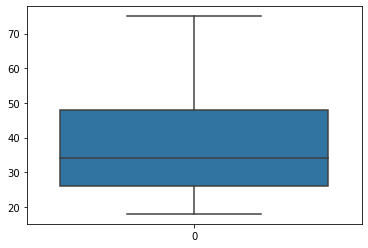

In [42]:
sns.boxplot(data=df['age'], width=0.8)

**Выбросов нет**

# Cоздать/ удалить переменные

In [43]:
import datetime as dt

In [44]:
df['date_start'] = pd.to_datetime(df['date_start']).dt.date

In [45]:
df['date_end'] = pd.to_datetime(df['date_end']).dt.date

In [46]:
df['delta'] = (df['date_end'] - df['date_start']).dt.days

In [47]:
df = df.drop(['date_start'], axis=1)

In [48]:
df = df.drop(['date_end'], axis=1)

In [49]:
df

,id,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus,delta
0,1,Мужской,44,Нет,Собственное,Гражданский брак/женат/замужем,Нет,Официальное,Новосибирская область,Нет,Да,Нет,9
1,2,Мужской,21,Пропуск поля,Живут с родителями,Холост,Нет,Официальное,Кемеровская область юг,Да,Нет,Нет,14
2,3,Мужской,25,Пропуск поля,Собственное,Холост,Да,Официальное,Кемеровская область север,Пропуск поля,Нет,Нет,14
3,4,Женский,47,Пропуск поля,Собственное,Гражданский брак/женат/замужем,Да,Официальное,Кемеровская область север,Нет,Нет,Нет,14
4,5,Мужской,22,Нет,Арендуемое,Гражданский брак/женат/замужем,Нет,Официальное,Кемеровская область север,Да,Да,Нет,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35207,35208,Мужской,30,Да,Долевая собственность,Гражданский брак/женат/замужем,Да,Официальное,Алтайский край,Да,Да,Нет,14
35208,35209,Женский,57,Нет,Собственное,Разведен,Да,Пропуск поля,Алтайский край,Да,Нет,Нет,14
35209,35210,Женский,38,Пропуск поля,Пропуск поля,Пропуск поля,Да,Пропуск поля,Новосибирская область,Нет,Да,Нет,14
35210,35211,Женский,19,Пропуск поля,Пропуск поля,Пропуск поля,Да,Пропуск поля,Кемеровская область юг,Нет,Нет,Нет,14


# Закодировать категориальные переменные

In [50]:
df = pd.get_dummies(df
               ,columns = ['gender']
               ,prefix = 'gender'
               )

In [51]:
df = pd.get_dummies(df
               ,columns = ['housing']
               ,prefix = 'housing'
               )

In [52]:
df = pd.get_dummies(df
               ,columns = ['region']
               ,prefix = 'region'
               )

In [53]:
df = pd.get_dummies(df
               ,columns = ['marstatus']
               ,prefix = 'marstatus'
               )

In [54]:
df = pd.get_dummies(df
               ,columns = ['jobtype']
               ,prefix = 'jobtype'
               )

In [57]:
df = pd.get_dummies(df
               ,columns = ['regclient']
               ,prefix = 'regclient'
               )

In [61]:
df = pd.get_dummies(df
               ,columns = ['credits']
               ,prefix = 'credits'
               )

In [60]:
df = pd.get_dummies(df
               ,columns = ['children']
               ,prefix = 'children'
               )

In [64]:
df = pd.get_dummies(df
               ,columns = ['auto']
               ,prefix = 'auto'
               )

## Разбить выборку на обучающую и тестовую

In [65]:
from sklearn.model_selection import train_test_split

y = df.delinq60plus
X = df.drop(['delinq60plus'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=42, 
                                                    stratify=y)

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

train_X_scaled = scaler.fit_transform(X_train)
test_X_scaled = scaler.fit_transform(X_test)

## Построить модель и оценить ее качество

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score (X_test, y_test)

0.7430735308215894

In [68]:
y_pred = rfc.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8305423244037445